# Network Visualization using networkx - Neerja Doshi

## Answer 1

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import jgraph
from operator import itemgetter, attrgetter
import matplotlib.pyplot as plt
import itertools
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot

import plotly.plotly as py
from plotly.graph_objs import *

init_notebook_mode(True)

In [2]:
def draw_graph(graph):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # draw graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

    # show graph
    plt.show()

### Creating graph and plotting with matplotlib

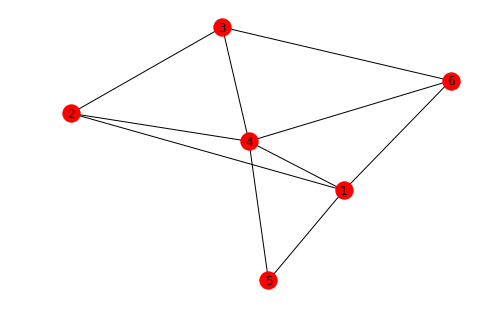

In [3]:
graph = [(4, 1),(1, 2),(2, 3), (3, 4),(4, 5), (5, 4), (4,2), (4, 2),(1, 6),(6, 3), (6, 4),(5, 5), (5, 1), (4,1)]
draw_graph(graph)
plt.figure(figsize=(20, 20))
# show Graph
plt.show()

## Answer 2 - Harry Potter Friend-or-Enemy Graph

In [4]:
# Generate data for edgelist and nodelist
char1 = ['harry', 'hermoine', 'hagrid', 'dumbledore', 'draco', 'dobby', 'ron', 'voldermort', 'ron', 'ginny', 'bellatrix', 'luna', 'snape', 'umbridge', 'sirius', 'neville', 'snape', 'luna', 'hermoine', 'hermoine', 'hermoine', 'hermoine']
char2 = ['hermoine', 'hagrid', 'dobby', 'voldermort', 'ginny', 'draco','voldermort', 'bellatrix', 'hermoine', 'harry', 'voldermort', 'sirius', 'neville', 'harry', 'hagrid', 'bellatrix', 'voldermort', 'umbridge', 'ron', 'umbridge', 'ginny', 'luna']

# 1 represents a good character, 0 represents an evil character
goodness = [1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1]

# 1 represents frienship, -1 represents enmity
f_or_e = [1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,1]

friend_enemy = pd.concat([pd.DataFrame(char1), pd.DataFrame(char2), pd.DataFrame(f_or_e)], axis=1)
friend_enemy.columns = ['Character1', 'Character2', 'friendORenemy']

nodelist = pd.concat([pd.DataFrame(char1), pd.DataFrame(goodness)], axis=1)
nodelist.columns = ['Character', 'Goodness']
nodelist.drop_duplicates(inplace = True)

In [5]:
# Save the csv files
nodelist.to_csv('nodelist.csv', index = None)
friend_enemy.to_csv('friend_enemy.csv', index = None)

In [6]:
# Read the generated data from the csv's
nodelist = pd.read_csv('nodelist.csv')
print(nodelist.head())
friend_enemy = pd.read_csv('friend_enemy.csv')
print(friend_enemy.head())

    Character  Goodness
0       harry         1
1    hermoine         1
2      hagrid         1
3  dumbledore         1
4       draco         0
   Character1  Character2  friendORenemy
0       harry    hermoine              1
1    hermoine      hagrid              1
2      hagrid       dobby              1
3  dumbledore  voldermort             -1
4       draco       ginny             -1


In [7]:
# Create an edge list
hp_graph = []
for i,j in zip(friend_enemy.Character1, friend_enemy.Character2):
    hp_graph.append((i,j))
hp_graph

[('harry', 'hermoine'),
 ('hermoine', 'hagrid'),
 ('hagrid', 'dobby'),
 ('dumbledore', 'voldermort'),
 ('draco', 'ginny'),
 ('dobby', 'draco'),
 ('ron', 'voldermort'),
 ('voldermort', 'bellatrix'),
 ('ron', 'hermoine'),
 ('ginny', 'harry'),
 ('bellatrix', 'voldermort'),
 ('luna', 'sirius'),
 ('snape', 'neville'),
 ('umbridge', 'harry'),
 ('sirius', 'hagrid'),
 ('neville', 'bellatrix'),
 ('snape', 'voldermort'),
 ('luna', 'umbridge'),
 ('hermoine', 'ron'),
 ('hermoine', 'umbridge'),
 ('hermoine', 'ginny'),
 ('hermoine', 'luna')]

### Using igraph/jgraph for plotting:

In [8]:
jgraph.draw(hp_graph, directed=False, shader='lambert', default_node_color=f_or_e)

In [9]:
friend_enemy[0:5]

,Character1,Character2,friendORenemy
0,harry,hermoine,1
1,hermoine,hagrid,1
2,hagrid,dobby,1
3,dumbledore,voldermort,-1
4,draco,ginny,-1


In [10]:
# Create a nodelist
nodelist1 = []
for i,j in zip(friend_enemy.Character1, goodness):
    nodelist1.append((i,j))
nodelist1

[('harry', 1),
 ('hermoine', 1),
 ('hagrid', 1),
 ('dumbledore', 1),
 ('draco', 0),
 ('dobby', 1),
 ('ron', 1),
 ('voldermort', 0),
 ('ron', 1),
 ('ginny', 1),
 ('bellatrix', 0),
 ('luna', 1),
 ('snape', 1),
 ('umbridge', 0),
 ('sirius', 1),
 ('neville', 1),
 ('snape', 1),
 ('luna', 1),
 ('hermoine', 1),
 ('hermoine', 1),
 ('hermoine', 1),
 ('hermoine', 1)]

In [11]:
# Create a graph
g = nx.Graph()
g.add_edges_from(hp_graph)

In [12]:
dict(nodelist1)

{'bellatrix': 0,
 'dobby': 1,
 'draco': 0,
 'dumbledore': 1,
 'ginny': 1,
 'hagrid': 1,
 'harry': 1,
 'hermoine': 1,
 'luna': 1,
 'neville': 1,
 'ron': 1,
 'sirius': 1,
 'snape': 1,
 'umbridge': 0,
 'voldermort': 0}

### Plotting Kamada Kawai and Spring Layout using networkx and matpltolib

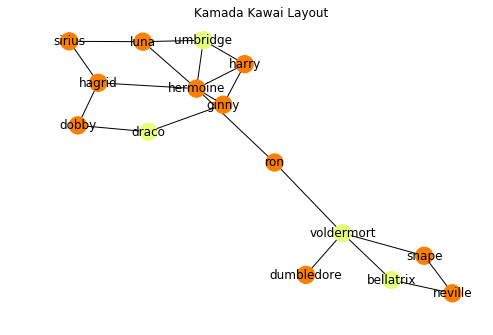

In [13]:
#  Kamada Kawai Layout
values = [dict(nodelist1).get(node, 0.75) for node in g.nodes()]
# values2 = [(f_or_e).get(node, 0.25) for node in g.nodes()]
nx.draw(g, cmap=plt.get_cmap('Wistia'), node_color=values, with_labels = True)
plt.title('Kamada Kawai Layout')
plt.show()

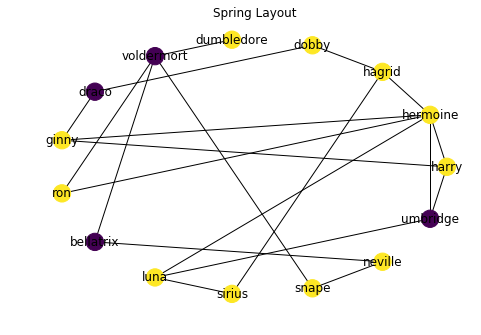

In [14]:
# Spring Layout
pos = nx.spring_layout(g)
nx.draw_circular(g, with_labels = True, node_color = values)
plt.title('Spring Layout')
plt.figure(figsize=(20, 20))
# show Graph
plt.show()

### Plotting Fruchterman Reingold layout in Plotly

In [32]:
init_notebook_mode(True)


pos = nx.fruchterman_reingold_layout(g)

N = len(nodelist.Character)

Xv = [pos[k][0] for k in nodelist.Character]
Yv = [pos[k][1] for k in nodelist.Character]
Xed = []
Yed = []

for edge in hp_graph:
    Xed += [pos[edge[0]][0], pos[edge[1]][0], None]
    Yed += [pos[edge[0]][1], pos[edge[1]][1], None]

labels = list(g.nodes)

trace3 = Scatter(
    x=Xed,
    y=Yed,
    mode='lines',
    line=Line(color='rgb(210,210,210)', width=1),
    hoverinfo='none')
trace4 = Scatter(
    x=Xv,
    y=Yv,
    mode='markers',
    name='net',
    marker=Marker(
        symbol='dot',
        size=10,
        color='#6959CD',
        line=Line(color='rgb(50,50,50)', width=1)),
    text=labels,
    hoverinfo='text')

axis = dict(
    showline=False,  # hide axis line, grid, ticklabels and  title
    zeroline=False,
    showgrid=False,
    showticklabels=False,
    title='')

width = 800
height = 800
layout = Layout(
    title="Harry Potter friend-enemy graph",
    font=Font(size=12),
    showlegend=False,
    autosize=False,
    width=width,
    height=height,
    xaxis=XAxis(axis),
    yaxis=YAxis(axis),
    margin=Margin(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',
    annotations=Annotations([
        Annotation(
            showarrow=False,
            text='Fruchterman Reingold layout',
            xref='paper',
            yref='paper',
            x=0,
            y=-0.1,
            xanchor='left',
            yanchor='bottom',
            font=Font(size=14))
    ]),
)

annot = "Fruchterman Reingold layout"

data1 = Data([trace3, trace4])
fig1 = Figure(data=data1, layout=layout)
fig1['layout']['annotations'][0]['text'] = annot
iplot(fig1)

### Properties of this network

In [33]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 20
Average degree:   2.6667


In [34]:
nx.diameter(g)

6

In [35]:
density = nx.density(g)
print("Network density:", density)

Network density: 0.19047619047619047


### Find and plot shortest path between Hagrid and Bellatrix

In [36]:
hagrid_to_bellatrix = nx.shortest_path(g, source="hagrid", target="bellatrix")

print("Shortest path between Hagird and Bellatrix:", hagrid_to_bellatrix)
print("Length of that path:", len(hagrid_to_bellatrix) - 1)

Shortest path between Hagird and Bellatrix: ['hagrid', 'hermoine', 'ron', 'voldermort', 'bellatrix']
Length of that path: 4


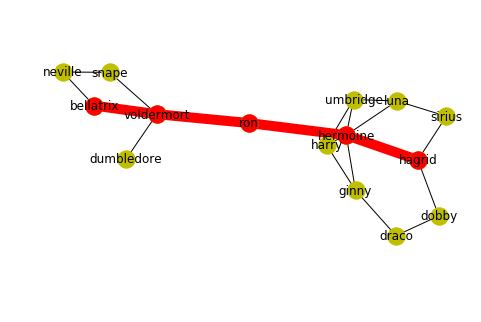

In [37]:
g = nx.Graph()
g.add_edges_from(hp_graph)
pos = nx.spring_layout(g)
nx.draw(g,pos,node_color='y')
# draw path in red
labels = {}
path = nx.shortest_path(g, source='hagrid',target='bellatrix')

# labels[0] = 'hagrid'
# labels[1] = 'hermoine'
# labels[2] = 'harry'
path_edges = zip(path,path[1:])
nx.draw_networkx_nodes(g,pos,nodelist=path,node_color='r', node_label = False)
nx.draw_networkx_edges(g,pos,edgelist=list(path_edges),edge_color='r',width=10, label = False)
nx.draw_networkx_labels(g,pos)

plt.axis('equal')
plt.show()

In [38]:
triadic_closure = nx.transitivity(g)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.20930232558139536


In [39]:
degree_dict = dict(g.degree(g.nodes()))
nx.set_node_attributes(g, degree_dict, 'degree')

In [40]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 3 nodes by degree:")
for d in sorted_degree[:3]:
    print(d)

Top 3 nodes by degree:
('hermoine', 6)
('voldermort', 4)
('harry', 3)


In [41]:
betweenness_dict = nx.betweenness_centrality(g) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(g) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(g, betweenness_dict, 'betweenness')
nx.set_node_attributes(g, eigenvector_dict, 'eigenvector')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
print("Top 3 nodes by betweenness centrality:")
for b in sorted_betweenness[:3]:
    print(b)

Top 3 nodes by betweenness centrality:
('hermoine', 0.6446886446886447)
('ron', 0.4945054945054945)
('voldermort', 0.47802197802197804)


In [42]:
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 3 nodes by eigen vector centrality:")
for b in sorted_eigen[:3]:
    print(b)

Top 3 nodes by eigen vector centrality:
('hermoine', 0.5616822737229703)
('umbridge', 0.3834796700350752)
('harry', 0.38001543878214505)


Here we can see that by both the centrality measures, the central nodes are different. This is because they measure different forms of centrality. **Betweenness measure how well connected (in between) a node is** in a graph, while the **eigen vector method computes centrality based on the degrees of the connecting nodes**. Thus, in the former, the 3 main links between the 2 clusters - Hermoine, Ron and Voldermort - are the 'central' nodes. In the eigen method, the most connected nodes - Hermoine, Umbridge and Harry - are the 'central' nodes.